In [2]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from scipy import stats

In [3]:
# Loading the arrays back
Distances = np.load('Distances.npy', allow_pickle=True)
Cos_distances = np.load('Cos_distances.npy', allow_pickle=True)
Norms = np.load('Norms.npy', allow_pickle=True)


### Showing the effect of the local standard deviation on the cosine distance of kernels 
(the smaller the standard deviation the better)

Regression Equation: y = 0.1272x + 0.5079
R² Score: 0.0021


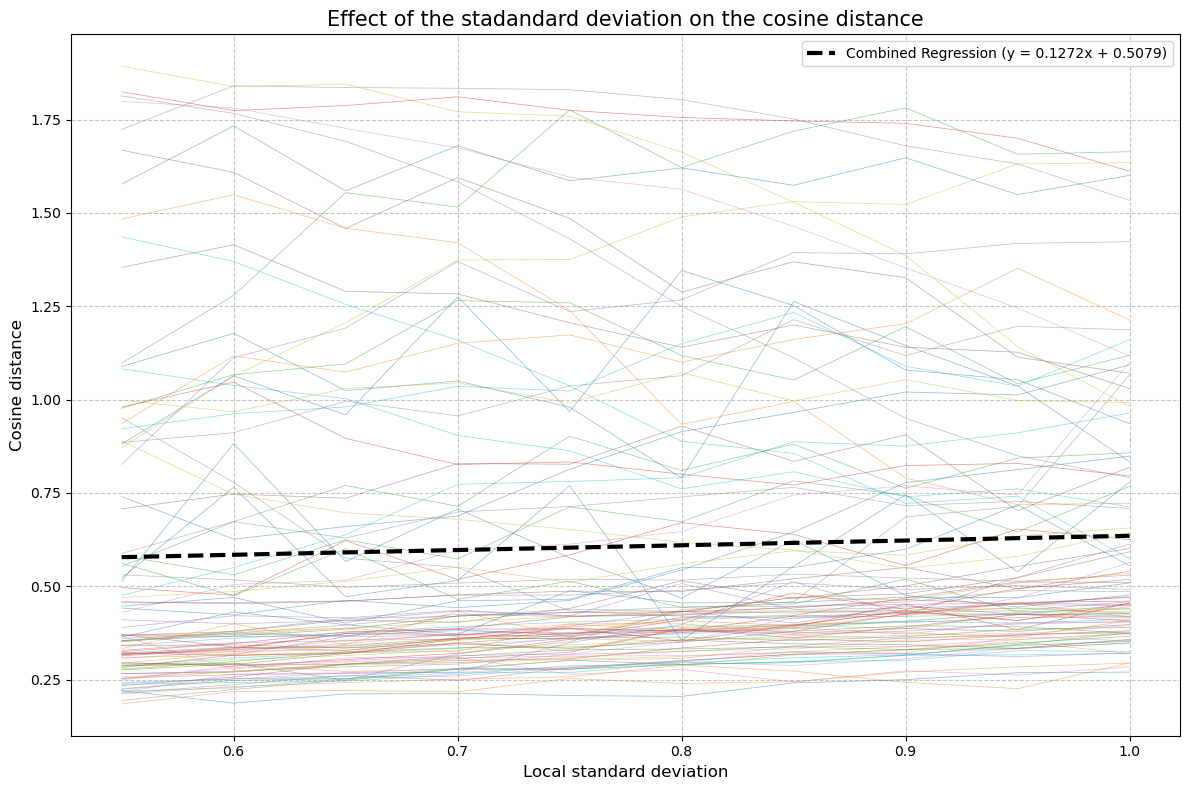

In [ ]:
# Create figure and axes
plt.figure(figsize=(12, 8))

# Store all points for combined regression
all_x = []
all_y = []

# Plot individual datasets as line plots
for idx1 in range(Cos_distances.shape[0]):
    for idx2 in range(Cos_distances.shape[1]):

        # Creating the lists of points for the plot
        x = [Cos_distances[idx1, idx2, idx3][2] for idx3 in range(Cos_distances.shape[2])]
        y = [Cos_distances[idx1, idx2, idx3][3] for idx3 in range(Cos_distances.shape[2])]
        
        plt.plot(x, y, 
                    #color=, 
                    #label=, 
                    linewidth=0.5,
                    #marker=,
                    #markersize=,
                    alpha=0.5) # Transparency
        
        # Collect points for combined regression
        all_x.extend(x)
        all_y.extend(y)

# Perform linear regression on all points
all_x = np.array(all_x)
all_y = np.array(all_y)

# Fit linear regression
#reg = LinearRegression().fit(all_x, all_y)
slope, intercept, r, p, std_err = stats.linregress(all_x, all_y)

# Generate regression line points
line_x = np.array([all_x.min(), all_x.max()]).reshape(-1, 1)
line_y = slope * line_x + intercept


# Plot regression line
plt.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')

# Customize plot
plt.title('Effect of the stadandard deviation on the cosine distance', fontsize=15)
plt.xlabel('Local standard deviation', fontsize=12)
plt.ylabel('Cosine distance', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Print regression details
print(f"Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R² Score: {(r**2):.4f}")

plt.tight_layout()
plt.show()

### Showing the effect of the number of trajectories on the cosine distance of kernels 


Regression Equation: y = 0.0000x + 0.5995
R² Score: 0.0001


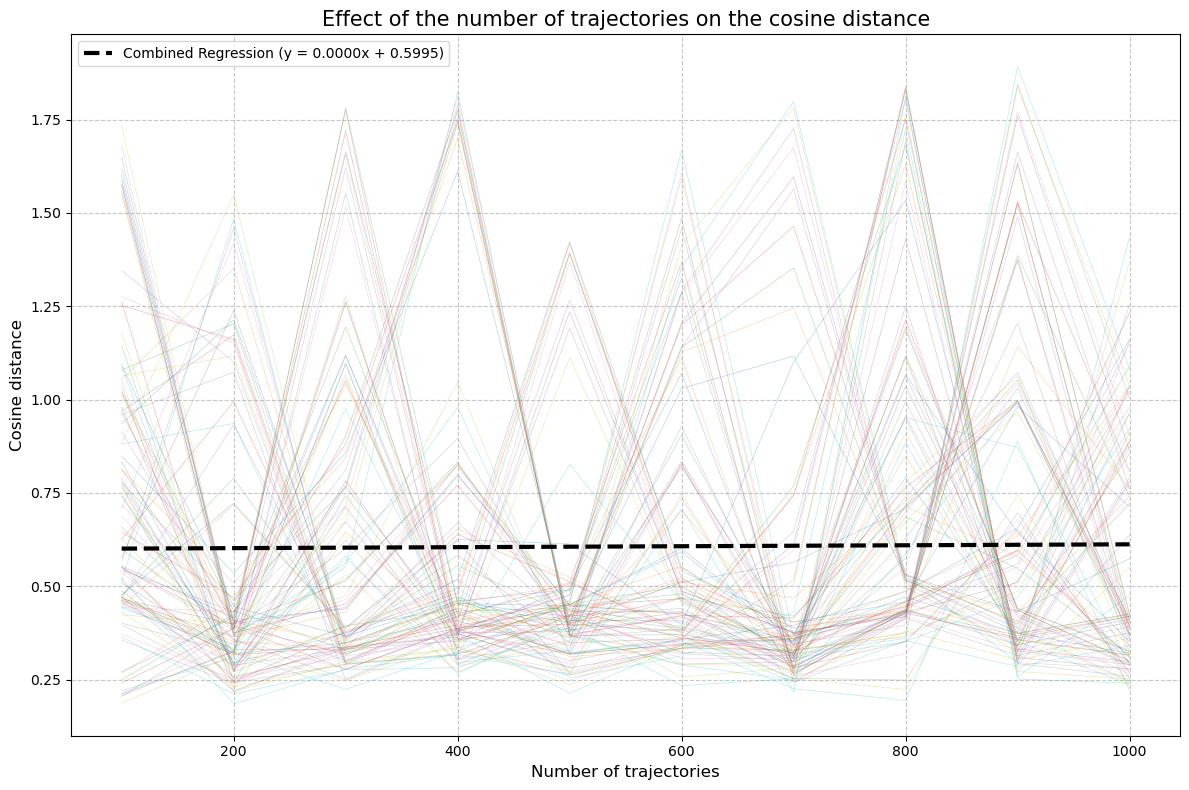

In [13]:
# Create figure and axes
plt.figure(figsize=(12, 8))

# Store all points for combined regression
all_x = []
all_y = []

# Plot individual datasets as line plots
for idx1 in range(Cos_distances.shape[0]):
    for idx3 in range(Cos_distances.shape[2]):

        # Creating the lists of points for the plot
        x = [Cos_distances[idx1, idx2, idx3][1] for idx2 in range(Cos_distances.shape[1])]
        y = [Cos_distances[idx1, idx2, idx3][3] for idx2 in range(Cos_distances.shape[1])]
        
        plt.plot(x, y, 
                    #color=, 
                    #label=, 
                    linewidth=0.5,
                    #marker=,
                    #markersize=,
                    alpha=0.3) # Transparency
        
        # Collect points for combined regression
        all_x.extend(x)
        all_y.extend(y)

# Perform linear regression on all points
all_x = np.array(all_x)
all_y = np.array(all_y)

# Fit linear regression
#reg = LinearRegression().fit(all_x, all_y)
slope, intercept, r, p, std_err = stats.linregress(all_x, all_y)

# Generate regression line points
line_x = np.array([all_x.min(), all_x.max()]).reshape(-1, 1)
line_y = slope * line_x + intercept


# Plot regression line
plt.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')

# Customize plot
plt.title('Effect of the number of trajectories on the cosine distance', fontsize=15)
plt.xlabel('Number of trajectories', fontsize=12)
plt.ylabel('Cosine distance', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Print regression details
print(f"Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R² Score: {(r**2):.4f}")

plt.tight_layout()
plt.show()

### Showing the effect of the number of formulas added on the cosine distance of kernels

Regression Equation: y = -0.0001x + 0.6705
R² Score: 0.0069


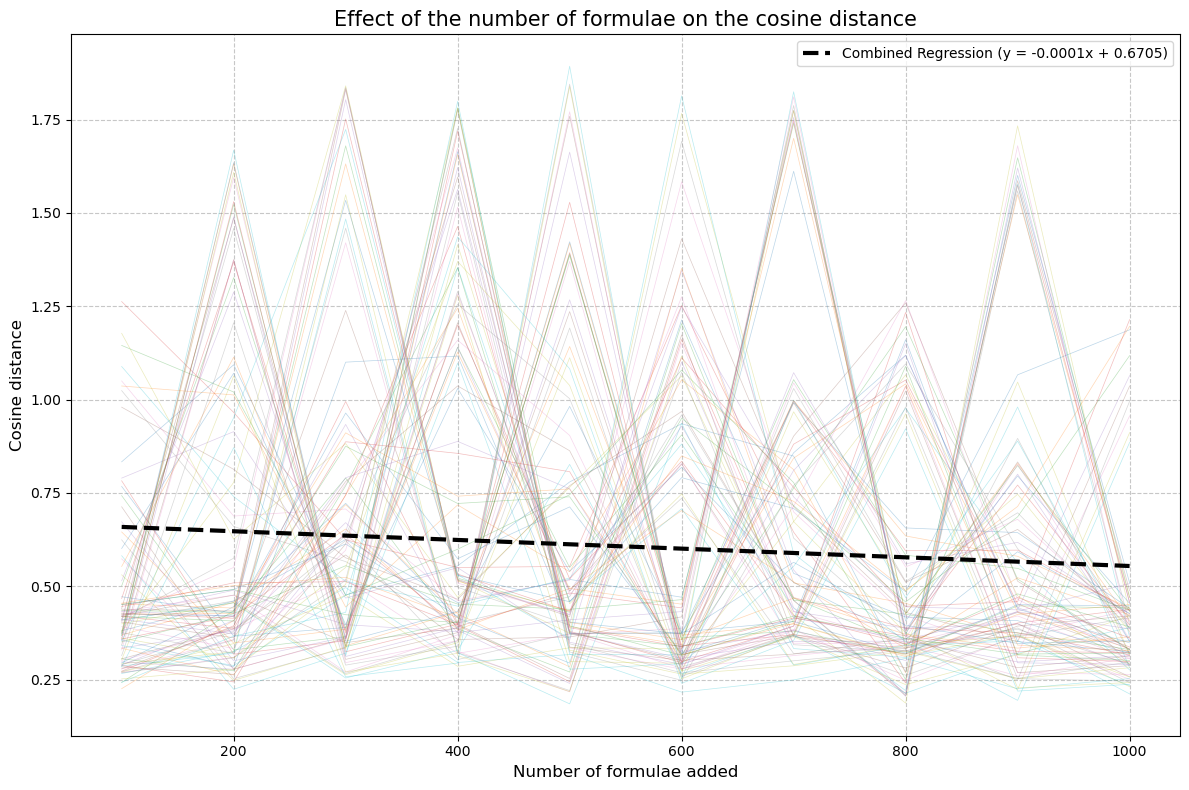

In [14]:
# Create figure and axes
plt.figure(figsize=(12, 8))

# Store all points for combined regression
all_x = []
all_y = []

# Plot individual datasets as line plots
for idx2 in range(Cos_distances.shape[1]):
    for idx3 in range(Cos_distances.shape[2]):

        # Creating the lists of points for the plot
        x = [Cos_distances[idx1, idx2, idx3][0] for idx1 in range(Cos_distances.shape[0])]
        y = [Cos_distances[idx1, idx2, idx3][3] for idx1 in range(Cos_distances.shape[0])]
        
        plt.plot(x, y, 
                    #color=, 
                    #label=, 
                    linewidth=0.5,
                    #marker=,
                    #markersize=,
                    alpha=0.3) # Transparency
        
        # Collect points for combined regression
        all_x.extend(x)
        all_y.extend(y)

# Perform linear regression on all points
all_x = np.array(all_x)
all_y = np.array(all_y)

# Fit linear regression
#reg = LinearRegression().fit(all_x, all_y)
slope, intercept, r, p, std_err = stats.linregress(all_x, all_y)

# Generate regression line points
line_x = np.array([all_x.min(), all_x.max()]).reshape(-1, 1)
line_y = slope * line_x + intercept


# Plot regression line
plt.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')

# Customize plot
plt.title('Effect of the number of formulae on the cosine distance', fontsize=15)
plt.xlabel('Number of formulae added', fontsize=12)
plt.ylabel('Cosine distance', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Print regression details
print(f"Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R² Score: {(r**2):.4f}")

plt.tight_layout()
plt.show()